## Ekstrak ZIP

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/kanker pneumonia/pneumonia.zip"
extract_to = "/content/drive/MyDrive/kanker pneumonia/pneumonia/"

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Done!")

Done!


## Distribusi Kelas

In [ ]:
import os

extract_to = "/content/drive/MyDrive/kanker pneumonia/pneumonia/"

os.listdir(extract_to)

['test', 'train', 'val']

In [ ]:
import os

for root, dirs, files in os.walk(extract_to):
    print("Folder:", root)
    for d in dirs:
        print("  Subfolder:", d)
    for f in files:
        print("  File:", f)
    print("-" * 40)

Streaming output truncated to the last 5000 lines.
  File: IM-0752-0001.jpeg
  File: IM-0753-0001.jpeg
  File: IM-0754-0001.jpeg
  File: IM-0755-0001.jpeg
  File: IM-0757-0001.jpeg
  File: IM-0761-0001.jpeg
  File: IM-0764-0001.jpeg
  File: IM-0766-0001.jpeg
  File: NORMAL2-IM-0383-0001.jpeg
  File: NORMAL2-IM-0384-0001.jpeg
  File: NORMAL2-IM-0385-0001.jpeg
  File: NORMAL2-IM-0386-0001.jpeg
  File: NORMAL2-IM-0388-0001.jpeg
  File: NORMAL2-IM-0389-0001.jpeg
  File: NORMAL2-IM-0390-0001.jpeg
  File: NORMAL2-IM-0391-0001.jpeg
  File: NORMAL2-IM-0392-0001.jpeg
  File: NORMAL2-IM-0393-0001.jpeg
  File: NORMAL2-IM-0394-0001.jpeg
  File: NORMAL2-IM-0395-0001-0001.jpeg
  File: NORMAL2-IM-0395-0001-0002.jpeg
  File: NORMAL2-IM-0395-0001.jpeg
  File: NORMAL2-IM-0396-0001.jpeg
  File: NORMAL2-IM-0397-0001.jpeg
  File: NORMAL2-IM-0399-0001.jpeg
  File: NORMAL2-IM-0401-0001.jpeg
  File: NORMAL2-IM-0402-0001.jpeg
  File: NORMAL2-IM-0403-0001.jpeg
  File: NORMAL2-IM-0404-0001.jpeg
  File: NORMAL2-I

In [ ]:
import shutil
import os

base = "/content/drive/MyDrive/kanker pneumonia/pneumonia/chest_xray/chest_xray/"
target = "/content/drive/MyDrive/kanker pneumonia/pneumonia/"

for folder in ["train", "test", "val"]:
    src = os.path.join(base, folder)
    dst = os.path.join(target, folder)
    if os.path.exists(src):
        shutil.move(src, dst)

In [ ]:
import shutil
import os

paths_to_delete = [
    "/content/drive/MyDrive/kanker pneumonia/pneumonia/chest_xray",
    "/content/drive/MyDrive/kanker pneumonia/pneumonia/__MACOSX",
]

for p in paths_to_delete:
    if os.path.exists(p):
        shutil.rmtree(p)

In [ ]:
import os

root = "/content/drive/MyDrive/kanker pneumonia/pneumonia/"

for r, d, f in os.walk(root):
    print(r, " -> ", d, "| files:", len(f))

/content/drive/MyDrive/kanker pneumonia/pneumonia/  ->  ['test', 'train', 'val'] | files: 0
/content/drive/MyDrive/kanker pneumonia/pneumonia/test  ->  ['NORMAL', 'PNEUMONIA'] | files: 1
/content/drive/MyDrive/kanker pneumonia/pneumonia/test/NORMAL  ->  [] | files: 234
/content/drive/MyDrive/kanker pneumonia/pneumonia/test/PNEUMONIA  ->  [] | files: 390
/content/drive/MyDrive/kanker pneumonia/pneumonia/train  ->  ['NORMAL', 'PNEUMONIA'] | files: 1
/content/drive/MyDrive/kanker pneumonia/pneumonia/train/NORMAL  ->  [] | files: 1342
/content/drive/MyDrive/kanker pneumonia/pneumonia/train/PNEUMONIA  ->  [] | files: 3876
/content/drive/MyDrive/kanker pneumonia/pneumonia/val  ->  ['NORMAL', 'PNEUMONIA'] | files: 1
/content/drive/MyDrive/kanker pneumonia/pneumonia/val/NORMAL  ->  [] | files: 9
/content/drive/MyDrive/kanker pneumonia/pneumonia/val/PNEUMONIA  ->  [] | files: 9


## Count Split

In [ ]:
import os

root = "/content/drive/MyDrive/kanker pneumonia/pneumonia/"
splits = ["train", "val", "test"]
classes = ["NORMAL", "PNEUMONIA"]

data_count = {}

for split in splits:
    data_count[split] = {}
    for cls in classes:
        folder = os.path.join(root, split, cls)
        count = len([f for f in os.listdir(folder) if f.lower().endswith(('.jpg','.jpeg','.png'))])
        data_count[split][cls] = count

data_count

{'train': {'NORMAL': 1341, 'PNEUMONIA': 3875},
 'val': {'NORMAL': 8, 'PNEUMONIA': 8},
 'test': {'NORMAL': 234, 'PNEUMONIA': 390}}

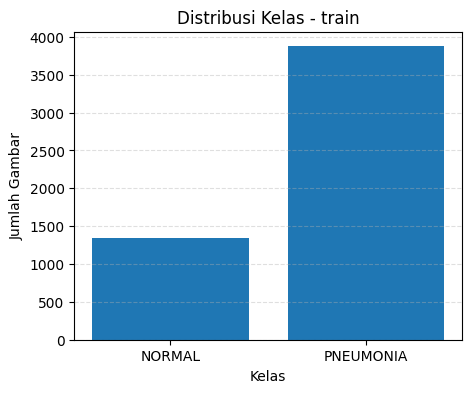

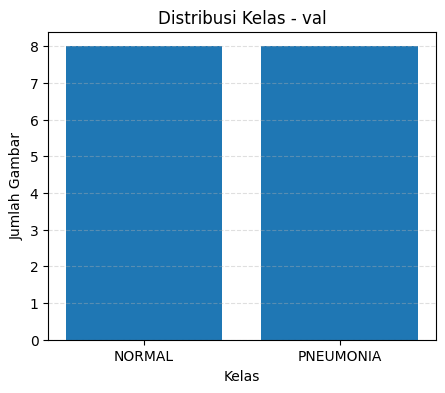

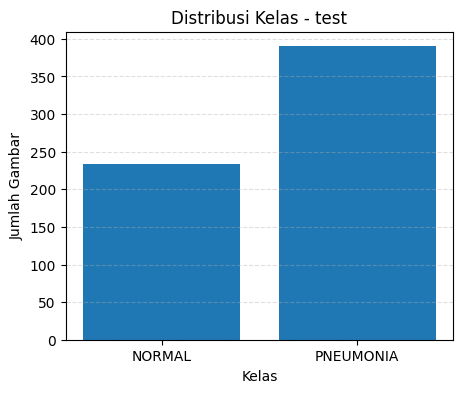

In [ ]:
import matplotlib.pyplot as plt

splits = ["train", "val", "test"]
classes = ["NORMAL", "PNEUMONIA"]

for split in splits:
    counts = [data_count[split][cls] for cls in classes]

    plt.figure(figsize=(5,4))
    plt.bar(classes, counts)
    plt.title(f"Distribusi Kelas - {split}")
    plt.xlabel("Kelas")
    plt.ylabel("Jumlah Gambar")
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.show()

## Split Ulang

In [ ]:
import os, shutil

root = "/content/drive/MyDrive/kanker pneumonia/pneumonia/"
splits = ["train", "val", "test"]
classes = ["NORMAL", "PNEUMONIA"]

output_root = "/content/drive/MyDrive/kanker pneumonia/dataset_clean/"

# buat folder NORMAL & PNEUMONIA
for cls in classes:
    os.makedirs(os.path.join(output_root, cls), exist_ok=True)

# gabungkan dan pindahkan semua file
for split in splits:
    for cls in classes:
        folder = os.path.join(root, split, cls)
        for f in os.listdir(folder):
            if f.lower().endswith(('.jpg','.jpeg','.png')):
                src = os.path.join(folder, f)
                dst = os.path.join(output_root, cls, f)
                shutil.copy(src, dst)   # memakai copy biar aman (nggak hilang dari dataset lama)

In [ ]:
import os

output_root = "/content/drive/MyDrive/kanker pneumonia/dataset_clean/"
classes = ["NORMAL", "PNEUMONIA"]

for cls in classes:
    folder = os.path.join(output_root, cls)
    count = len([f for f in os.listdir(folder) if f.lower().endswith(('.jpg','.jpeg','.png'))])
    print(f"{cls}: {count} files")

# total semua
total = sum([
    len([f for f in os.listdir(os.path.join(output_root, cls))
         if f.lower().endswith(('.jpg','.jpeg','.png'))])
    for cls in classes
])
print("\nTotal files:", total)

NORMAL: 1583 files
PNEUMONIA: 4273 files

Total files: 5856


## Statisfied Weight (Pembobotan ulang) handling imbalance

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

root = "/content/drive/MyDrive/kanker pneumonia/dataset_clean/"
output_root = "/content/drive/MyDrive/kanker pneumonia/dataset_split/"

classes = ["NORMAL", "PNEUMONIA"]

# Buat folder split baru
for split in ["train", "val", "test"]:
    for cls in classes:
        os.makedirs(os.path.join(output_root, split, cls), exist_ok=True)

# Ambil semua file + labelnya
files = []
labels = []

for cls in classes:
    folder = os.path.join(root, cls)
    for f in os.listdir(folder):
        if f.lower().endswith(('.jpg','.jpeg','.png')):
            files.append(os.path.join(folder, f))
            labels.append(cls)

# Stratified split 80/10/10
X_train, X_temp, y_train, y_temp = train_test_split(
    files, labels, test_size=0.20, stratify=labels, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

# Copy file ke folder baru
def move_files(X, y, split):
    for file, cls in zip(X, y):
        dst = os.path.join(output_root, split, cls, os.path.basename(file))
        shutil.copy(file, dst)

move_files(X_train, y_train, "train")
move_files(X_val, y_val, "val")
move_files(X_test, y_test, "test")

print("Done splitting!")
print("Train:", len(X_train))
print("Val:  ", len(X_val))
print("Test: ", len(X_test))

Done splitting!
Train: 4684
Val:   586
Test:  586


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

label_to_idx = {"NORMAL":0, "PNEUMONIA":1}
y_train_idx = np.array([label_to_idx[y] for y in y_train])

cw = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0,1]),
    y=y_train_idx
)

class_weight = {0: cw[0], 1: cw[1]}
class_weight

{0: np.float64(1.8499210110584519), 1: np.float64(0.6851960210649503)}

## Konfigurasi Image

In [ ]:
# CONFIG (revisi path)
import os, random, numpy as np, tensorflow as tf
SEED = 42
BATCH_SIZE = 4 # Reduced batch size to prevent OOM errors
IMG_SIZE = (600,600)
AUTOTUNE = tf.data.AUTOTUNE

DATASET_SPLIT = "/content/drive/MyDrive/kanker pneumonia/dataset_split/"
TRAIN_DIR = os.path.join(DATASET_SPLIT, "train")
VAL_DIR   = os.path.join(DATASET_SPLIT, "val")
TEST_DIR  = os.path.join(DATASET_SPLIT, "test")

MODEL_SAVE_PATH = "/content/drive/MyDrive/kanker pneumonia/models/effb7_best.h5"

# seeds
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)


In [ ]:
TEST_DIR

'/content/drive/MyDrive/kanker pneumonia/pneumonia/dataset_split/test'

In [ ]:
import os
print("TRAIN EXISTS:", os.path.exists(TRAIN_DIR))
print("VAL EXISTS:", os.path.exists(VAL_DIR))
print("TEST EXISTS:", os.path.exists(TEST_DIR))

TRAIN EXISTS: True
VAL EXISTS: True
TEST EXISTS: True


## Grayscale 1 channel to 3 channel img

In [ ]:
from pathlib import Path
import cv2
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess

def load_and_preprocess(path):
    # used via tf.py_function: returns np.float32 array (600,600,3)
    p = path.numpy().decode('utf-8')
    img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
    if img is None:
        # return black image if corrupted (so pipeline doesn't break)
        img = np.zeros((IMG_SIZE[0], IMG_SIZE[1]), dtype=np.uint8)
    img = cv2.resize(img, IMG_SIZE)
    img = img.astype('float32') / 255.0
    img = np.stack([img, img, img], axis=-1)
    img = eff_preprocess(img)
    return img

def tf_load_fn(path, label):
    # Modified: Tout should be a list of types, even if only one output
    img_tuple = tf.py_function(func=load_and_preprocess, inp=[path], Tout=[tf.float32])
    img = img_tuple[0] # Extract the image tensor from the tuple
    img.set_shape((IMG_SIZE[0], IMG_SIZE[1], 3))
    label = tf.cast(label, tf.float32)
    return img, label

def build_dataset_from_dir(directory, batch_size=BATCH_SIZE, shuffle=False):
    file_paths = []
    labels = []
    class_names = sorted([d.name for d in Path(directory).iterdir() if d.is_dir()])
    class_to_label = {class_names[i]: i for i in range(len(class_names))}  # NORMAL=0
    for cls in class_names:
        for f in (Path(directory)/cls).glob("*"):
            if f.suffix.lower() in [".jpg",".jpeg",".png"]:
                file_paths.append(str(f))
                labels.append(class_to_label[cls])
    ds = tf.data.Dataset.from_tensor_slices((file_paths, labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(file_paths), seed=SEED)
    ds = ds.map(lambda p, l: tf_load_fn(p, l), num_parallel_calls=AUTOTUNE)
    ds = ds.batch(batch_size).prefetch(AUTOTUNE)
    return ds

# Safe augmentation (train only)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.014),   # ~±5°
    tf.keras.layers.RandomTranslation(0.02, 0.02),
    tf.keras.layers.RandomZoom(0.05),
    tf.keras.layers.RandomBrightness(0.1)
])

def with_augmentation(ds):
    return ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)

# Build datasets
train_ds = build_dataset_from_dir(TRAIN_DIR, batch_size=BATCH_SIZE, shuffle=True)
train_ds = with_augmentation(train_ds)
val_ds = build_dataset_from_dir(VAL_DIR, batch_size=BATCH_SIZE, shuffle=False)
test_ds = build_dataset_from_dir(TEST_DIR, batch_size=BATCH_SIZE, shuffle=False)

# Quick smoke test: fetch one batch
for xb, yb in train_ds.take(1):
    print("batch images:", xb.shape, "labels:", yb.numpy()[:8])

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/kanker pneumonia/pneumonia/dataset_split/train'

In [ ]:
from pathlib import Path
class_names = sorted([d.name for d in Path(TRAIN_DIR).iterdir() if d.is_dir()])
class_to_label = {class_names[i]: i for i in range(len(class_names))}
print("class_names:", class_names)
print("class_to_label:", class_to_label)

class_names: ['NORMAL', 'PNEUMONIA']
class_to_label: {'NORMAL': 0, 'PNEUMONIA': 1}


## Modelling EfficientNetB7 Failed

In [ ]:
# ===== Fix: build model on CPU + smaller backbone + safe batch =====
import os, random, numpy as np, tensorflow as tf, gc
from pathlib import Path
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Config (ubah sesuai kebutuhan)
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)

# Data/model paths (sudah ada)
DATASET_SPLIT = "/content/drive/MyDrive/kanker pneumonia/pneumonia/dataset_split/"
TRAIN_DIR = os.path.join(DATASET_SPLIT, "train")
VAL_DIR   = os.path.join(DATASET_SPLIT, "val")
TEST_DIR  = os.path.join(DATASET_SPLIT, "test")
MODEL_SAVE_PATH = "/content/drive/MyDrive/kanker pneumonia/models/eff_safe_best.h5"
os.makedirs(os.path.dirname(MODEL_SAVE_PATH), exist_ok=True)

# Memory-safe defaults
BATCH_SIZE = 1          # start very small
BACKBONE = "EfficientNetB3"   # options: EfficientNetB0..B7; start with B3
IMG_SIZE = (300, 300)         # B3 default ~300; B4 ~380, B7 600 (bigger memory)
USE_MIXED_PRECISION = True    # try True if GPU supports; set False if troubles

# optional: enable mixed precision
if USE_MIXED_PRECISION:
    try:
        from tensorflow.keras import mixed_precision
        mixed_precision.set_global_policy('mixed_float16')
        print("Mixed precision enabled:", mixed_precision.global_policy())
    except Exception as e:
        print("Couldn't enable mixed precision:", e)

# clear memory / session if rerunning
tf.keras.backend.clear_session()
gc.collect()

# Helper to choose backbone class
def get_backbone_class(name):
    from tensorflow.keras.applications import (
        EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3,
        EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
    )
    mapping = {
        "EfficientNetB0": EfficientNetB0, "EfficientNetB1": EfficientNetB1,
        "EfficientNetB2": EfficientNetB2, "EfficientNetB3": EfficientNetB3,
        "EfficientNetB4": EfficientNetB4, "EfficientNetB5": EfficientNetB5,
        "EfficientNetB6": EfficientNetB6, "EfficientNetB7": EfficientNetB7,
    }
    return mapping.get(name, EfficientNetB3)

BackboneClass = get_backbone_class(BACKBONE)

# Build model ON CPU to avoid GPU OOM during initialization
print(f"Building {BACKBONE} model on CPU with img size {IMG_SIZE} and batch {BATCH_SIZE} ...")
try:
    with tf.device('/CPU:0'):
        base = BackboneClass(include_top=False, weights='imagenet', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
        base.trainable = False
        inputs = layers.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
        x = base(inputs, training=False)
        x = layers.GlobalAveragePooling2D()(x)
        x = layers.Dropout(0.4)(x)
        x = layers.Dense(256, activation='relu')(x)
        x = layers.Dropout(0.3)(x)
        # ensure final output dtype float32 to avoid mixed-precision issues at loss
        outputs = layers.Dense(1, activation='sigmoid', dtype='float32')(x)
        model = models.Model(inputs, outputs)
        # compile on CPU (doesn't matter, will run on GPU during fit)
        model.compile(optimizer=Adam(1e-4),
                      loss='binary_crossentropy',
                      metrics=[tf.keras.metrics.AUC(name='auc'),
                               tf.keras.metrics.Precision(name='precision'),
                               tf.keras.metrics.Recall(name='recall')])
    print("Model built successfully on CPU.")
except Exception as e:
    print("Error building model on CPU:", e)
    raise

# show summary (safe)
model.summary()

Mixed precision enabled: <DTypePolicy "mixed_float16">
Building EfficientNetB3 model on CPU with img size (300, 300) and batch 1 ...
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Model built successfully on CPU.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb3 (Functional)     │ (None, 10, 10, 1536)   │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1536)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       393,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,177,264 (42.64 MB)

 Trainable params: 393,729 (1.50 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

## EfficientNetB0

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
import os

# ========== Config ==========
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
BACKBONE = tf.keras.applications.EfficientNetB0
INITIAL_LR = 1e-4
FINE_TUNE_LR = 1e-5
EPOCHS_HEAD = 8
EPOCHS_FINE = 8
UNFREEZE_LAST_N = 30   # unfreeze last N layers of the backbone (tune if OOM)
MODEL_PATH = "best_effb0.h5"

# ========== Data ==========
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR, label_mode="binary", image_size=IMG_SIZE, batch_size=BATCH_SIZE, shuffle=True, seed=42
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    VAL_DIR, label_mode="binary", image_size=IMG_SIZE, batch_size=BATCH_SIZE, shuffle=False
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TEST_DIR, label_mode="binary", image_size=IMG_SIZE, batch_size=BATCH_SIZE, shuffle=False
)

# Prefetch for performance
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

# ========== Compute class weights from train_ds ==========
# gather labels from train_ds (works for reasonably sized train set)
y_train = []
for _, y in train_ds.unbatch().as_numpy_iterator():
    y_train.append(int(y))
y_train = np.array(y_train)
cw = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight = dict(enumerate(cw))
print("class_weight:", class_weight)

# ========== Build model (base frozen) ==========
base = BACKBONE(include_top=False, weights="imagenet", input_shape=IMG_SIZE + (3,))
base.trainable = False  # freeze for head training

inputs = tf.keras.Input(shape=IMG_SIZE + (3,))
x = tf.keras.applications.efficientnet.preprocess_input(inputs)
x = base(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs, outputs)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=INITIAL_LR),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
)
model.summary()


Found 4684 files belonging to 2 classes.
Found 586 files belonging to 2 classes.
Found 586 files belonging to 2 classes.


/tmp/ipython-input-3893425026.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_train.append(int(y))


class_weight: {0: np.float64(1.8499210110584519), 1: np.float64(0.6851960210649503)}


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050,852 (15.45 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

## Fine Tuning 30 Layer

In [ ]:
# ========== Callbacks (shared) ==========
callbacks_head = [
    tf.keras.callbacks.ModelCheckpoint(MODEL_PATH, monitor='val_loss', save_best_only=True, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, verbose=1, restore_best_weights=False)
]

# ========== Stage 1: train head ==========
print("=== Stage 1: training head (base frozen) ===")
history_head = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_HEAD,
    class_weight=class_weight,
    callbacks=callbacks_head
)

# Load best weights saved during head training (optional)
if os.path.exists(MODEL_PATH):
    model.load_weights(MODEL_PATH)

# ========== Stage 2: unfreeze last N layers & fine-tune ==========
print("=== Stage 2: fine-tuning (unfreeze last N layers) ===")
# Unfreeze last N layers of the base
total_layers = len(base.layers)
n = min(UNFREEZE_LAST_N, total_layers)
for layer in base.layers[: total_layers - n]:
    layer.trainable = False
for layer in base.layers[total_layers - n:]:
    layer.trainable = True

# Recompile with lower LR
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=FINE_TUNE_LR),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
)

# New callbacks for fine-tune (keep same checkpoint path)
callbacks_ft = [
    tf.keras.callbacks.ModelCheckpoint(MODEL_PATH, monitor='val_loss', save_best_only=True, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, verbose=1, restore_best_weights=False)
]

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_FINE,
    class_weight=class_weight,
    callbacks=callbacks_ft
)

=== Stage 1: training head (base frozen) ===
Epoch 1/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.6662 - auc: 0.6548 - loss: 0.6705 - precision: 0.7833 - recall: 0.7478
Epoch 1: val_loss improved from inf to 0.46531, saving model to best_effb0.h5


293/293 ━━━━━━━━━━━━━━━━━━━━ 115s 286ms/step - accuracy: 0.6664 - auc: 0.6552 - loss: 0.6703 - precision: 0.7836 - recall: 0.7479 - val_accuracy: 0.8549 - val_auc: 0.9263 - val_loss: 0.4653 - val_precision: 0.9476 - val_recall: 0.8478 - learning_rate: 1.0000e-04
Epoch 2/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.8133 - auc: 0.8965 - loss: 0.4784 - precision: 0.9362 - recall: 0.7937
Epoch 2: val_loss improved from 0.46531 to 0.37471, saving model to best_effb0.h5


293/293 ━━━━━━━━━━━━━━━━━━━━ 52s 177ms/step - accuracy: 0.8133 - auc: 0.8965 - loss: 0.4783 - precision: 0.9362 - recall: 0.7937 - val_accuracy: 0.8720 - val_auc: 0.9419 - val_loss: 0.3747 - val_precision: 0.9513 - val_recall: 0.8689 - learning_rate: 1.0000e-04
Epoch 3/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.8501 - auc: 0.9311 - loss: 0.3920 - precision: 0.9534 - recall: 0.8315
Epoch 3: val_loss improved from 0.37471 to 0.32866, saving model to best_effb0.h5


293/293 ━━━━━━━━━━━━━━━━━━━━ 48s 163ms/step - accuracy: 0.8501 - auc: 0.9311 - loss: 0.3919 - precision: 0.9534 - recall: 0.8316 - val_accuracy: 0.8823 - val_auc: 0.9474 - val_loss: 0.3287 - val_precision: 0.9543 - val_recall: 0.8806 - learning_rate: 1.0000e-04
Epoch 4/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.8543 - auc: 0.9368 - loss: 0.3551 - precision: 0.9554 - recall: 0.8362
Epoch 4: val_loss improved from 0.32866 to 0.30209, saving model to best_effb0.h5


293/293 ━━━━━━━━━━━━━━━━━━━━ 83s 167ms/step - accuracy: 0.8543 - auc: 0.9368 - loss: 0.3550 - precision: 0.9554 - recall: 0.8363 - val_accuracy: 0.8959 - val_auc: 0.9513 - val_loss: 0.3021 - val_precision: 0.9598 - val_recall: 0.8946 - learning_rate: 1.0000e-04
Epoch 5/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.8750 - auc: 0.9521 - loss: 0.3119 - precision: 0.9639 - recall: 0.8585
Epoch 5: val_loss improved from 0.30209 to 0.28463, saving model to best_effb0.h5


293/293 ━━━━━━━━━━━━━━━━━━━━ 48s 163ms/step - accuracy: 0.8750 - auc: 0.9521 - loss: 0.3119 - precision: 0.9639 - recall: 0.8585 - val_accuracy: 0.9027 - val_auc: 0.9544 - val_loss: 0.2846 - val_precision: 0.9602 - val_recall: 0.9040 - learning_rate: 1.0000e-04
Epoch 6/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.8674 - auc: 0.9468 - loss: 0.3163 - precision: 0.9533 - recall: 0.8569
Epoch 6: val_loss improved from 0.28463 to 0.27224, saving model to best_effb0.h5


293/293 ━━━━━━━━━━━━━━━━━━━━ 49s 166ms/step - accuracy: 0.8674 - auc: 0.9469 - loss: 0.3162 - precision: 0.9533 - recall: 0.8569 - val_accuracy: 0.8993 - val_auc: 0.9568 - val_loss: 0.2722 - val_precision: 0.9577 - val_recall: 0.9016 - learning_rate: 1.0000e-04
Epoch 7/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.8768 - auc: 0.9586 - loss: 0.2837 - precision: 0.9653 - recall: 0.8599
Epoch 7: val_loss improved from 0.27224 to 0.26529, saving model to best_effb0.h5


293/293 ━━━━━━━━━━━━━━━━━━━━ 49s 168ms/step - accuracy: 0.8768 - auc: 0.9586 - loss: 0.2837 - precision: 0.9653 - recall: 0.8600 - val_accuracy: 0.8993 - val_auc: 0.9584 - val_loss: 0.2653 - val_precision: 0.9577 - val_recall: 0.9016 - learning_rate: 1.0000e-04
Epoch 8/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.8840 - auc: 0.9585 - loss: 0.2780 - precision: 0.9657 - recall: 0.8689
Epoch 8: val_loss improved from 0.26529 to 0.26003, saving model to best_effb0.h5


293/293 ━━━━━━━━━━━━━━━━━━━━ 48s 163ms/step - accuracy: 0.8840 - auc: 0.9585 - loss: 0.2780 - precision: 0.9657 - recall: 0.8689 - val_accuracy: 0.8993 - val_auc: 0.9598 - val_loss: 0.2600 - val_precision: 0.9577 - val_recall: 0.9016 - learning_rate: 1.0000e-04
=== Stage 2: fine-tuning (unfreeze last N layers) ===
Epoch 1/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.8295 - auc: 0.9256 - loss: 0.3710 - precision: 0.9534 - recall: 0.8018
Epoch 1: val_loss improved from inf to 0.29900, saving model to best_effb0.h5


293/293 ━━━━━━━━━━━━━━━━━━━━ 104s 254ms/step - accuracy: 0.8295 - auc: 0.9257 - loss: 0.3709 - precision: 0.9535 - recall: 0.8018 - val_accuracy: 0.8737 - val_auc: 0.9629 - val_loss: 0.2990 - val_precision: 0.9657 - val_recall: 0.8571 - learning_rate: 1.0000e-05
Epoch 2/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.8745 - auc: 0.9596 - loss: 0.2822 - precision: 0.9704 - recall: 0.8510
Epoch 2: val_loss improved from 0.29900 to 0.25237, saving model to best_effb0.h5


293/293 ━━━━━━━━━━━━━━━━━━━━ 101s 167ms/step - accuracy: 0.8745 - auc: 0.9596 - loss: 0.2822 - precision: 0.9704 - recall: 0.8510 - val_accuracy: 0.8993 - val_auc: 0.9690 - val_loss: 0.2524 - val_precision: 0.9718 - val_recall: 0.8876 - learning_rate: 1.0000e-05
Epoch 3/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.9004 - auc: 0.9686 - loss: 0.2445 - precision: 0.9732 - recall: 0.8860
Epoch 3: val_loss improved from 0.25237 to 0.22423, saving model to best_effb0.h5


293/293 ━━━━━━━━━━━━━━━━━━━━ 50s 172ms/step - accuracy: 0.9004 - auc: 0.9686 - loss: 0.2444 - precision: 0.9732 - recall: 0.8860 - val_accuracy: 0.9078 - val_auc: 0.9735 - val_loss: 0.2242 - val_precision: 0.9698 - val_recall: 0.9016 - learning_rate: 1.0000e-05
Epoch 4/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.9037 - auc: 0.9742 - loss: 0.2207 - precision: 0.9717 - recall: 0.8916
Epoch 4: val_loss improved from 0.22423 to 0.20619, saving model to best_effb0.h5


293/293 ━━━━━━━━━━━━━━━━━━━━ 85s 181ms/step - accuracy: 0.9037 - auc: 0.9742 - loss: 0.2207 - precision: 0.9717 - recall: 0.8917 - val_accuracy: 0.9164 - val_auc: 0.9766 - val_loss: 0.2062 - val_precision: 0.9701 - val_recall: 0.9133 - learning_rate: 1.0000e-05
Epoch 5/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.9240 - auc: 0.9809 - loss: 0.1940 - precision: 0.9767 - recall: 0.9160
Epoch 5: val_loss improved from 0.20619 to 0.19055, saving model to best_effb0.h5


293/293 ━━━━━━━━━━━━━━━━━━━━ 53s 181ms/step - accuracy: 0.9240 - auc: 0.9809 - loss: 0.1940 - precision: 0.9767 - recall: 0.9160 - val_accuracy: 0.9266 - val_auc: 0.9788 - val_loss: 0.1906 - val_precision: 0.9706 - val_recall: 0.9274 - learning_rate: 1.0000e-05
Epoch 6/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.9195 - auc: 0.9788 - loss: 0.1977 - precision: 0.9778 - recall: 0.9080
Epoch 6: val_loss improved from 0.19055 to 0.18179, saving model to best_effb0.h5


293/293 ━━━━━━━━━━━━━━━━━━━━ 49s 167ms/step - accuracy: 0.9195 - auc: 0.9789 - loss: 0.1977 - precision: 0.9778 - recall: 0.9080 - val_accuracy: 0.9266 - val_auc: 0.9808 - val_loss: 0.1818 - val_precision: 0.9706 - val_recall: 0.9274 - learning_rate: 1.0000e-05
Epoch 7/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.9328 - auc: 0.9844 - loss: 0.1732 - precision: 0.9795 - recall: 0.9256
Epoch 7: val_loss improved from 0.18179 to 0.16787, saving model to best_effb0.h5


293/293 ━━━━━━━━━━━━━━━━━━━━ 48s 163ms/step - accuracy: 0.9328 - auc: 0.9844 - loss: 0.1731 - precision: 0.9795 - recall: 0.9256 - val_accuracy: 0.9334 - val_auc: 0.9818 - val_loss: 0.1679 - val_precision: 0.9709 - val_recall: 0.9368 - learning_rate: 1.0000e-05
Epoch 8/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.9379 - auc: 0.9880 - loss: 0.1541 - precision: 0.9809 - recall: 0.9316
Epoch 8: val_loss improved from 0.16787 to 0.16086, saving model to best_effb0.h5


293/293 ━━━━━━━━━━━━━━━━━━━━ 51s 172ms/step - accuracy: 0.9379 - auc: 0.9880 - loss: 0.1541 - precision: 0.9809 - recall: 0.9316 - val_accuracy: 0.9352 - val_auc: 0.9828 - val_loss: 0.1609 - val_precision: 0.9709 - val_recall: 0.9391 - learning_rate: 1.0000e-05


## Fine-Tuning 100 layer terakhir (jangan dirun)

In [ ]:
# ===== Fine-tune snippet (run after head training) =====
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import numpy as np
import os

# --- HYPERPARAMS ---
# jumlah layer terakhir backbone yang mau di-unfreeze
UNFREEZE_LAST_N = 100   # kurangi jika OOM, naikkan jika GPU kuat
FINE_TUNE_LR = 1e-5
EPOCHS_FINE = 8         # atur sesuai kebutuhan
PATIENCE_LR = 3
PATIENCE_ES = 5

# --- Sanity checks: required objects must exist ---
required = ['model', 'base', 'train_ds', 'val_ds', 'class_weight', 'MODEL_SAVE_PATH']
missing = [name for name in required if name not in globals()]
if missing:
    raise RuntimeError(f"Missing required object(s): {missing}. Run head-train stage first.")

# --- Unfreeze last N layers of base ---
print("Total layers in base:", len(base.layers))
# ensure UNFREEZE_LAST_N not larger than layer count
n = min(UNFREEZE_LAST_N, len(base.layers))
print(f"Unfreezing last {n} layers of the backbone...")

# freeze all first, then unfreeze last n
for layer in base.layers:
    layer.trainable = False
for layer in base.layers[-n:]:
    layer.trainable = True

# Optional: print which layers are trainable (first few)
trainable = [l.name for l in base.layers[-n:] if l.trainable]
print("Sample trainable layers (last few):", trainable[:6])

# --- Recompile with lower learning rate ---
# If you used mixed_precision, ensure optimizer wrapped accordingly (Keras does it automatically)
opt = Adam(FINE_TUNE_LR)
model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc'),
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)
print("Model recompiled for fine-tuning with LR =", FINE_TUNE_LR)

# --- Callbacks ---
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                                 patience=PATIENCE_LR, min_lr=1e-7, verbose=1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=PATIENCE_ES, verbose=1)
# reuse existing SaveBestByRecallNormal callback if defined, else fallback to ModelCheckpoint by val_loss
if 'SaveBestByRecallNormal' in globals():
    checkpoint_cb = SaveBestByRecallNormal(val_ds, MODEL_SAVE_PATH)
else:
    checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(MODEL_SAVE_PATH, monitor='val_loss',
                                                       save_best_only=True, verbose=1)

# --- Fit (fine-tune) ---
history_ft = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_FINE,
    class_weight=class_weight,
    callbacks=[checkpoint_cb, reduce_lr, early_stop]
)

# --- Save history and report ---
import pandas as pd
hist_df = pd.DataFrame(history_ft.history)
hist_csv = os.path.join(os.path.dirname(MODEL_SAVE_PATH), "history_fine.csv")
hist_df.to_csv(hist_csv, index=False)
print("Fine-tune history saved to:", hist_csv)

# --- Quick evaluate best model on validation and test (if test_ds exists) ---
print("Loading best model from:", MODEL_SAVE_PATH)
best = tf.keras.models.load_model(MODEL_SAVE_PATH, compile=False)
best.compile(loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

def compute_metrics(dataset, model):
    y_true = []; y_prob = []
    for xb, yb in dataset:
        preds = model.predict(xb, verbose=0)
        y_prob.extend(preds.ravel().tolist())
        y_true.extend(yb.numpy().astype(int).tolist())
    import numpy as np
    from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
    y_prob = np.array(y_prob); y_true = np.array(y_true)
    y_pred = (y_prob >= 0.5).astype(int)
    print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification report:\n", classification_report(y_true, y_pred, target_names=['NORMAL','PNEUMONIA']))
    print("ROC AUC:", roc_auc_score(y_true, y_prob))

print("Validation metrics (best model):")
compute_metrics(val_ds, best)

if 'test_ds' in globals():
    print("\nTest metrics (best model):")
    compute_metrics(test_ds, best)

print("Fine-tuning finished.")


## Evaluasi

In [ ]:
# Load best model and evaluate on test
print("Loading best model and evaluating on test set...")
best = tf.keras.models.load_model(MODEL_PATH, compile=False)
best.compile(loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
y_true = []; y_prob = []
for xb, yb in test_ds:
    preds = best.predict(xb, verbose=0)
    y_prob.extend(preds.ravel().tolist())
    y_true.extend(yb.numpy().astype(int).tolist())

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import numpy as np
y_prob = np.array(y_prob); y_true = np.array(y_true)
y_pred = (y_prob >= 0.5).astype(int)

print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification report:\n", classification_report(y_true, y_pred, target_names=['NORMAL','PNEUMONIA']))
print("Test ROC AUC:", roc_auc_score(y_true, y_prob))

Loading best model and evaluating on test set...
Confusion matrix:
 [[148  10]
 [ 11 417]]

Classification report:
               precision    recall  f1-score   support

      NORMAL       0.93      0.94      0.93       158
   PNEUMONIA       0.98      0.97      0.98       428

    accuracy                           0.96       586
   macro avg       0.95      0.96      0.95       586
weighted avg       0.96      0.96      0.96       586

Test ROC AUC: 0.9866023896841358


## Evaluasi Confusion Matrix, Classification Report, AUC, ROC, Loss dan Akurasi

=== Classification report (test) ===
              precision    recall  f1-score   support

      NORMAL       0.93      0.94      0.93       158
   PNEUMONIA       0.98      0.97      0.98       428

    accuracy                           0.96       586
   macro avg       0.95      0.96      0.95       586
weighted avg       0.96      0.96      0.96       586



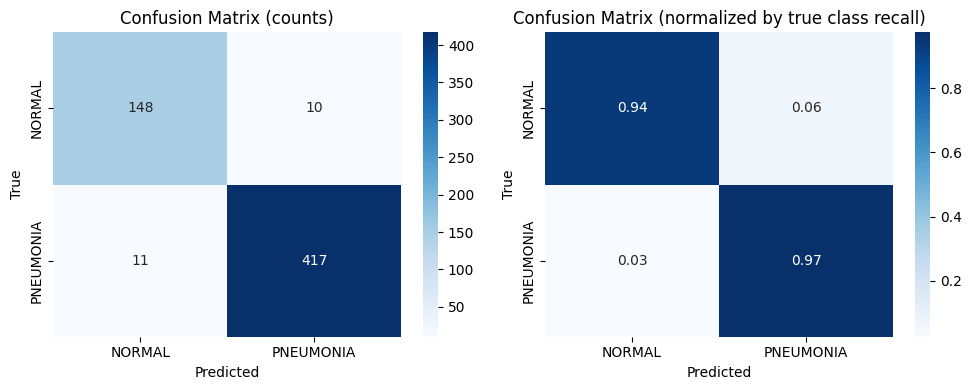

Saved classification report csv -> artifacts/plots/classification_report.csv


,class,precision,recall,f1-score,support
0,NORMAL,0.930818,0.936709,0.933754,158
1,PNEUMONIA,0.976581,0.974299,0.975439,428
avg,macro,0.953699,0.955504,0.954596,586


Using history variable: history_head


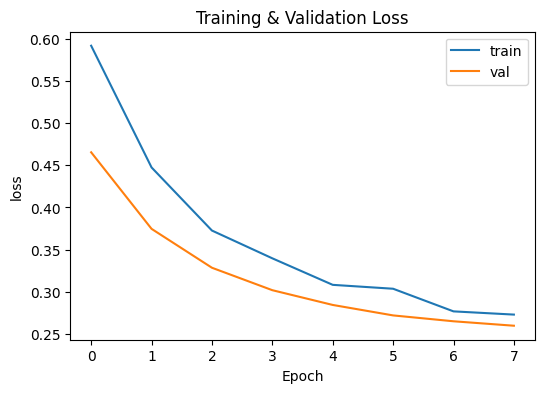

Saved: artifacts/plots/loss.png


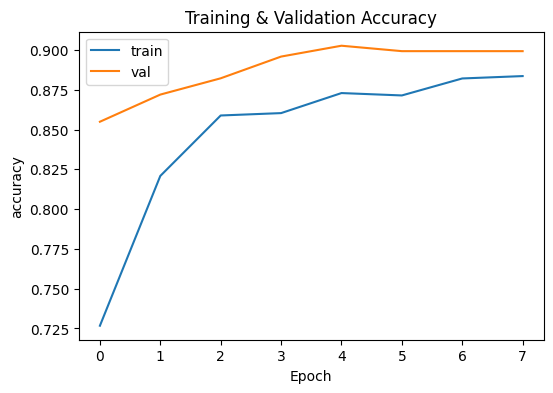

Saved: artifacts/plots/accuracy.png


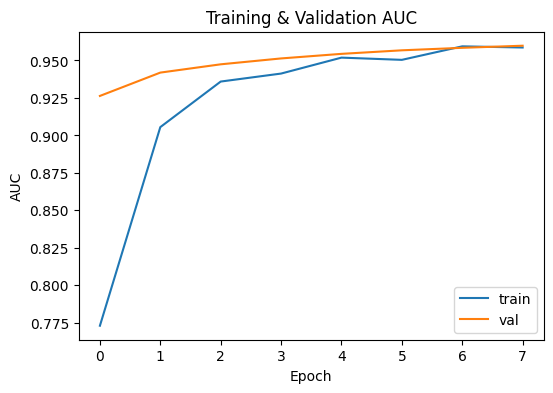

Saved: artifacts/plots/auc.png


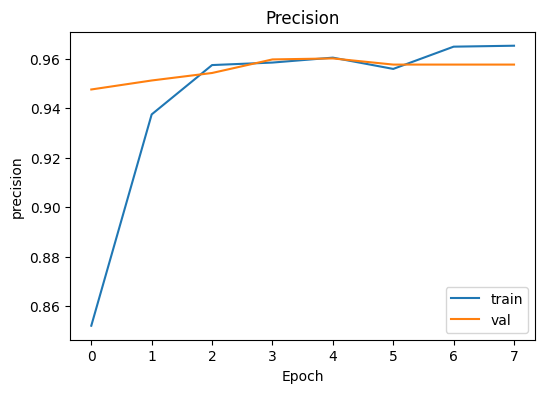

Saved: artifacts/plots/precision.png


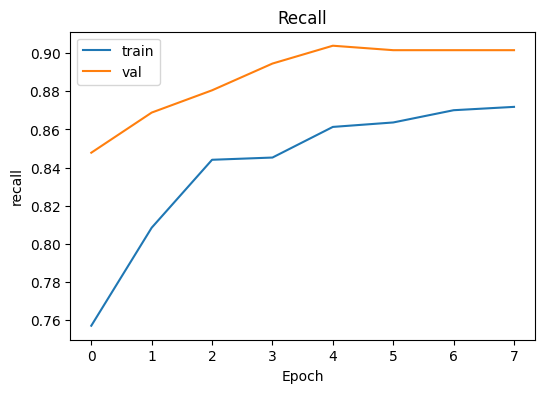

Saved: artifacts/plots/recall.png
All done — plots saved to artifacts/plots


In [ ]:
# plotting_utils.py — jalankan di notebook setelah evaluasi & training selesai
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# ================= CONFIG =================
OUT_DIR = "artifacts/plots"
os.makedirs(OUT_DIR, exist_ok=True)
CLASS_NAMES = ['NORMAL', 'PNEUMONIA']
THRESH = 0.5   # threshold untuk mengubah probabilitas jadi label

# ============= 1) Classification report + Confusion matrix heatmap ============
# expects y_true (list/np.array) and y_prob (list/np.array) to exist
y_true = np.array(y_true)
y_prob = np.array(y_prob)
y_pred = (y_prob >= THRESH).astype(int)

# print textual report
print("=== Classification report (test) ===")
print(classification_report(y_true, y_pred, target_names=CLASS_NAMES))

# confusion matrix (absolute counts)
cm = confusion_matrix(y_true, y_pred)
cm_norm = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 1e-8)  # per-class recall normalization

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (counts)')

plt.subplot(1,2,2)
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (normalized by true class recall)')

plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "confusion_matrix.png"), dpi=200)
plt.show()

# ============= 2) Nice tabular classification report (DataFrame) =============
from sklearn.metrics import precision_recall_fscore_support
prec, rec, f1, sup = precision_recall_fscore_support(y_true, y_pred, labels=[0,1], zero_division=0)
import pandas as pd
report_df = pd.DataFrame({
    "class": CLASS_NAMES,
    "precision": prec,
    "recall": rec,
    "f1-score": f1,
    "support": sup
})
report_df.loc['avg'] = [
    "macro",
    np.mean(prec),
    np.mean(rec),
    np.mean(f1),
    np.sum(sup)
]
report_csv = os.path.join(OUT_DIR, "classification_report.csv")
report_df.to_csv(report_csv, index=False)
print("Saved classification report csv ->", report_csv)
display(report_df)

# ============= 3) Plot training history: loss & accuracy ============
# Determine which history variable exists
hist = None
# Common names: history, history_head, history_ft, history_fine
for candidate in ['history', 'history_head', 'history_ft', 'history_fine', 'history_train', 'history1']:
    if candidate in globals():
        hv = globals()[candidate]
        # hv may be a History object or dict
        if hasattr(hv, "history"):
            hist = hv.history
        elif isinstance(hv, dict):
            hist = hv
        if hist is not None:
            print("Using history variable:", candidate)
            break

# If no single history found, try concatenating head + fine if both exist
if hist is None:
    combined = {}
    parts = []
    for name in ['history_head', 'history_fine', 'history_ft', 'history']:
        if name in globals():
            obj = globals()[name]
            if hasattr(obj, "history"):
                parts.append(obj.history)
            elif isinstance(obj, dict):
                parts.append(obj)
    if parts:
        # merge by concatenating lists for each metric
        for k in parts[0].keys():
            combined[k] = []
            for p in parts:
                if k in p:
                    combined[k].extend(p[k])
        hist = combined
        print("Combined history from parts:", [p.keys() for p in parts])

if hist is None:
    print("No history object found in globals (history, history_head, history_fine, history_ft). Skipping training plots.")
else:
    # typical keys: loss, val_loss, accuracy or auc or precision/recall
    def plot_metric(key, title=None, ylabel=None):
        if key not in hist:
            return
        plt.figure(figsize=(6,4))
        plt.plot(hist[key], label='train')
        val_key = 'val_' + key if 'val_' + key in hist else None
        if val_key:
            plt.plot(hist[val_key], label='val')
        plt.xlabel('Epoch')
        plt.ylabel(ylabel or key)
        plt.title(title or key)
        plt.legend()
        fname = os.path.join(OUT_DIR, f"{key}.png")
        plt.savefig(fname, dpi=200)
        plt.show()
        print("Saved:", fname)

    # Plot loss
    plot_metric('loss', title='Training & Validation Loss', ylabel='loss')
    # Common accuracy key variants
    for acc_key in ['accuracy', 'acc']:
        if acc_key in hist or 'val_' + acc_key in hist:
            plot_metric(acc_key, title='Training & Validation Accuracy', ylabel='accuracy')
            break
    # Plot AUC if available
    if 'auc' in hist or 'val_auc' in hist:
        plot_metric('auc', title='Training & Validation AUC', ylabel='AUC')

    # If precision/recall present, plot them too
    if 'precision' in hist or 'val_precision' in hist:
        plot_metric('precision', title='Precision', ylabel='precision')
    if 'recall' in hist or 'val_recall' in hist:
        plot_metric('recall', title='Recall', ylabel='recall')

print("All done — plots saved to", OUT_DIR)

## AUC dan ROC

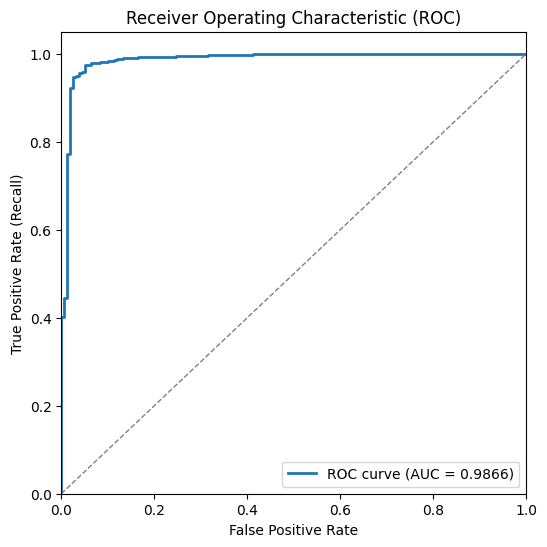

Saved ROC plot -> artifacts/plots/roc_curve.png
ROC AUC = 0.9866023896841358


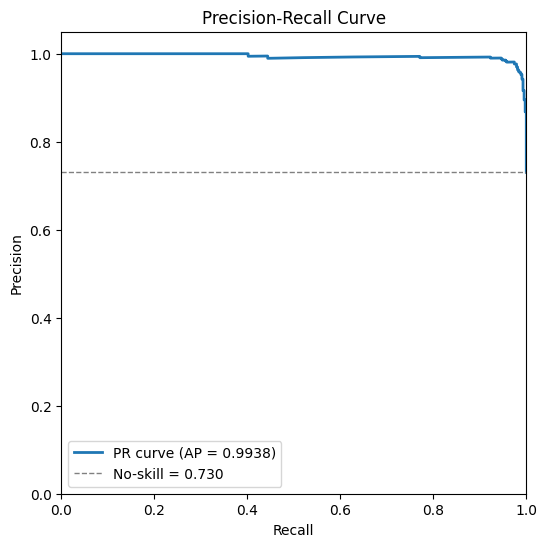

Saved PR plot -> artifacts/plots/precision_recall_curve.png
Average Precision (AP) = 0.9938023306545568


In [ ]:
# ROC + Precision-Recall plots (run after evaluation)
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

OUT_DIR = "artifacts/plots"
os.makedirs(OUT_DIR, exist_ok=True)

# ensure arrays
y_true = np.array(y_true)
y_prob = np.array(y_prob)

# ---------- ROC Curve ----------
fpr, tpr, thresholds_roc = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
roc_path = os.path.join(OUT_DIR, "roc_curve.png")
plt.savefig(roc_path, dpi=200)
plt.show()
print("Saved ROC plot ->", roc_path)
print("ROC AUC =", roc_auc)

# ---------- Precision-Recall Curve ----------
precision, recall, thresholds_pr = precision_recall_curve(y_true, y_prob)
avg_precision = average_precision_score(y_true, y_prob)

# fix: ensure no_skill is float
no_skill = float(np.sum(y_true == 1) / len(y_true))

plt.figure(figsize=(6,6))
plt.plot(recall, precision, lw=2, label=f'PR curve (AP = {avg_precision:.4f})')
plt.plot([0,1], [no_skill, no_skill], color='gray', linestyle='--', lw=1,
         label=f'No-skill = {no_skill:.3f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
pr_path = os.path.join(OUT_DIR, "precision_recall_curve.png")
plt.savefig(pr_path, dpi=200)
plt.show()
print("Saved PR plot ->", pr_path)
print("Average Precision (AP) =", avg_precision)

## Label Predicted dan Label aktual

In [ ]:
import numpy as np

all_predictions = []  # akan berisi dict: img, true, pred, prob

for xb, yb in test_ds:
    preds = best.predict(xb, verbose=0).ravel()
    pred_labels = (preds >= 0.5).astype(int)
    true_labels = yb.numpy().astype(int)

    for i in range(len(pred_labels)):
        all_predictions.append({
            "img": xb[i].numpy().astype("uint8"),
            "true": int(true_labels[i]),
            "pred": int(pred_labels[i]),
            "prob": float(preds[i])
        })

len(all_predictions)

/tmp/ipython-input-2688975977.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "true": int(true_labels[i]),


586

In [ ]:
import matplotlib.pyplot as plt
import random

def show_random_examples(all_preds, correct=True, n=6):
    """
    correct=True  -> tampilkan prediksi benar
    correct=False -> tampilkan prediksi salah
    n -> jumlah contoh yang ingin ditampilkan
    """
    # filter benar/salah
    if correct:
        subset = [x for x in all_preds if x["true"] == x["pred"]]
        title = "Contoh Prediksi BENAR (acak)"
    else:
        subset = [x for x in all_preds if x["true"] != x["pred"]]
        title = "Contoh Prediksi SALAH (acak)"

    if len(subset) == 0:
        print("Tidak ada data untuk kategori ini.")
        return

    # ambil acak
    selected = random.sample(subset, min(n, len(subset)))

    # plot
    plt.figure(figsize=(12, 6))
    for i, ex in enumerate(selected):
        plt.subplot(2, 3, i+1)
        plt.imshow(ex["img"])
        plt.title(f"True: {ex['true']} • Pred: {ex['pred']}\nProb: {ex['prob']:.2f}")
        plt.axis("off")

    plt.suptitle(title, fontsize=14)
    plt.show()

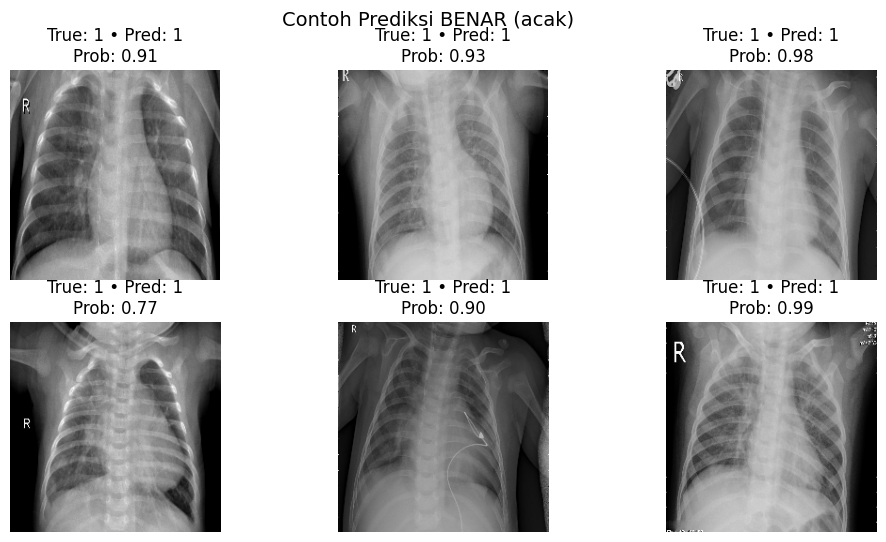

In [ ]:
show_random_examples(all_predictions, correct=True, n=6)

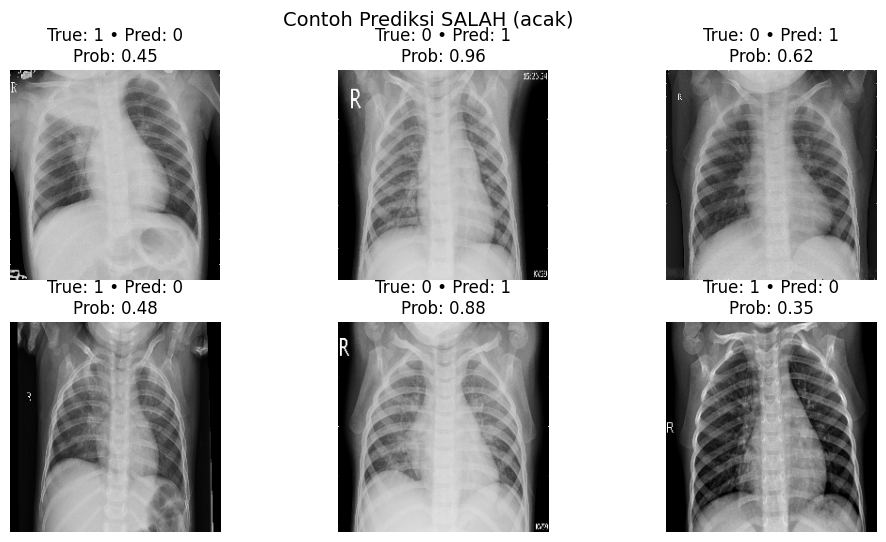

In [ ]:
show_random_examples(all_predictions, correct=False, n=6)

## TURU